In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../../base_df.csv")

In [106]:
# Stats
# Count projects
print("Number of projects:", len(df[["project name"]].drop_duplicates()))
# List of projects
print("Project names:\n", "\n".join([i[0] for i in df[["project name"]].drop_duplicates().values]), sep="")
# Count unique commits
print("Number of unique commits:", len(df[["project name", "commit hash"]].drop_duplicates()))
# Count cache tuples
print("Number of unique cache tuples:", len(df[["project name", "commit hash", "coq version"]].drop_duplicates()))
# Count executed proofs
df1 = df[["project name", "commit hash", "coq version", "filename", "command index", "proof index"]]
df1_proofs_only = df1[df1["proof index"] != 0]
print("Number of executed proofs:", len(df1_proofs_only.drop_duplicates()))
# Count successfully executed sentences
print("Number of successfully executed sentences:", len(df))
# Count compiled files
df3 = df[["project name", "commit hash", "coq version", "filename"]]
print("Number of compiled files:", len(df3.drop_duplicates()))
# Get max open goals and histogram of open goals
df["total goal count"] = df["foreground goal count"] + df["background goal count"] + df["abandoned goal count"] + df["shelved goal count"]
print("Maximum total open goal count:", df["total goal count"].max())
# DF with proof sentences only
df["total hypothesis count"] = df["foreground hypothesis count"] + df["background hypothesis count"] + df["abandoned hypothesis count"] + df["shelved hypothesis count"]

Number of projects: 9
Project names:
hoare-tut
coqoban
pocklington
coq-simple-io
coq-http
dblib
bigenough
sudoku
huffman
Number of unique commits: 191
Number of unique cache tuples: 514
Number of executed proofs: 59628
Number of successfully executed sentences: 849663
Number of compiled files: 5556
Maximum total open goal count: 17


Text(0.5, 0, 'Number of open hypotheses')

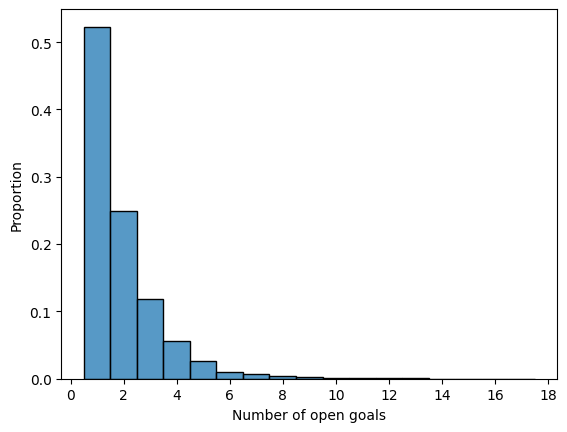

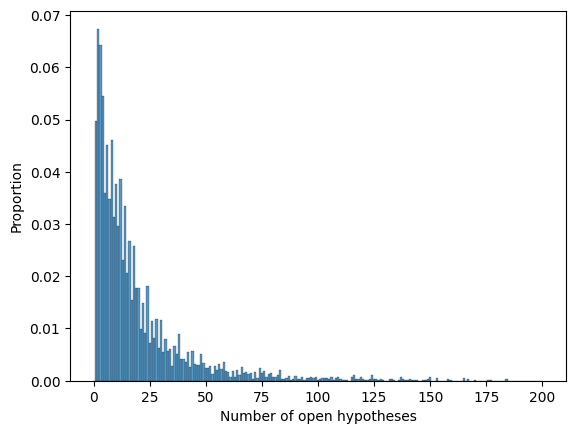

In [107]:
# Histogram
df_proofs_only = df[df["proof index"] != 0]
fig = plt.figure()
sns.histplot(data=df_proofs_only[df_proofs_only["total goal count"] > 0], x="total goal count", stat="proportion", discrete=True)
ax = fig.axes[0]
ax.set_xticks(range(0, 20, 2))
ax.set_xlabel("Number of open goals")
# ax.set_ylabel("Proportion of occurrences")
# Get histogram of open hypotheses
fig = plt.figure()
sns.histplot(data=df_proofs_only[df_proofs_only["total hypothesis count"] > 0], x="total hypothesis count", stat="proportion", discrete=True, binrange=[0, 200])
ax = fig.axes[0]
# ax.set_xticks(range(0, 201, 25))
# ax.set_xlim(-25, 225)
ax.set_xlabel("Number of open hypotheses")
# ax.set_ylabel("Number of occurrences")

In [126]:
# TODO: average sentence counts and proof counts per project, averaged over commits and coq version
print("Sentence counts. The count column here also shows the number of cache tuples per project.")
df.value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").describe()
# The below histgorams look like crap. Not enough unique bins. Better to use the table above
# project_names = list(df["project name"].unique())
# for project_name in project_names:
#     plt.figure()
#     df[df["project name"] == project_name].value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").hist()

Sentence counts. The count column here also shows the number of cache tuples per project.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,18.0,43.000000,0.000000,43.0,43.0,43.0,43.0,43.0
coq-http,7.0,25.000000,0.000000,25.0,25.0,25.0,25.0,25.0
coq-simple-io,220.0,273.054545,93.223043,16.0,206.0,287.0,351.0,392.0
coqoban,15.0,455.000000,0.000000,455.0,455.0,455.0,455.0,455.0
dblib,82.0,1636.731707,3.158562,1629.0,1638.0,1638.0,1638.0,1640.0
hoare-tut,21.0,348.142857,1.590148,346.0,346.0,348.0,350.0,350.0
huffman,79.0,4185.088608,91.592491,3946.0,4189.0,4189.0,4245.0,4262.0
pocklington,16.0,6546.000000,0.000000,6546.0,6546.0,6546.0,6546.0,6546.0
sudoku,56.0,3659.571429,10.765023,3654.0,3654.0,3654.0,3654.0,3680.0


In [109]:
print("Proof counts. Projects coq-http and coq-simple-io don't have any proofs in the successfully extracted commits.")
df.loc[df["proof index"] > 0].loc[df["proof step index"] == 0].value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").describe()

Proof counts. Projects coq-http and coq-simple-io don't have any proofs in the successfully extracted commits.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,18.0,5.00000,0.000000,5.0,5.0,5.0,5.0,5.0
coqoban,15.0,3.00000,0.000000,3.0,3.0,3.0,3.0,3.0
dblib,82.0,193.00000,0.000000,193.0,193.0,193.0,193.0,193.0
hoare-tut,21.0,25.00000,0.000000,25.0,25.0,25.0,25.0,25.0
huffman,79.0,315.21519,1.411227,311.0,314.0,316.0,316.0,318.0
pocklington,16.0,265.00000,0.000000,265.0,265.0,265.0,265.0,265.0
sudoku,56.0,250.00000,0.000000,250.0,250.0,250.0,250.0,250.0


In [110]:
print("Files per project.")
df[["project name", "commit hash", "coq version", "filename"]].drop_duplicates().value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").describe()

Files per project.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,18.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
coq-http,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
coq-simple-io,220.0,8.654545,3.804435,1.0,7.0,8.0,13.0,14.0
coqoban,15.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
dblib,82.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
hoare-tut,21.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
huffman,79.0,25.594937,0.494041,25.0,25.0,26.0,26.0,26.0
pocklington,16.0,14.000000,0.000000,14.0,14.0,14.0,14.0,14.0
sudoku,56.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


In [111]:
print("Command type occurrences.")
df.value_counts(subset="command type")

Command type occurrences.


command type
VernacSolve                      531786
VernacEndProof                    59613
VernacStartTheoremProof           52488
VernacProof                       51941
VernacAssumption                  29340
VernacDefinition                  19866
VernacRequire                     18308
ExtractionConstant                12588
VernacHints                       10035
VernacBullet                       8620
ExtractionInlinedConstant          8248
VernacInstance                     6418
VernacFixpoint                     5418
VernacArguments                    5272
VernacInductive                    5246
VernacDeclareTacticDefinition      4810
VernacEndSegment                   4066
VernacBeginSection                 2899
VernacSetOption                    1271
VernacNotation                     1267
VernacDefineModule                 1230
VernacInfix                        1064
VernacEndSubproof                   976
VernacSubproof                      976
VernacCheckMayEval         

In [112]:
print("Command type occurrences grouped by project")
# If we really want to show all this, save it as a CSV file. The output of describe() is itself a dataframe.
df.value_counts(subset=["project name", "commit hash", "coq version", "command type"]).groupby(["project name", "command type"]).describe()

Command type occurrences grouped by project


count         mean       std  \
project name command type                                                  
bigenough    VernacDeclareTacticDefinition   18.0     8.000000  0.000000   
             VernacDefineModule              18.0     1.000000  0.000000   
             VernacDefinition                18.0     5.000000  0.000000   
             VernacEndProof                  18.0     5.000000  0.000000   
             VernacEndSegment                18.0     1.000000  0.000000   
...                                           ...          ...       ...   
sudoku       VernacProof                     56.0   179.000000  0.000000   
             VernacRequire                   56.0    39.000000  0.000000   
             VernacSolve                     56.0  2683.000000  0.000000   
             VernacStartTheoremProof         56.0   239.000000  0.000000   
             VernacSubproof                  56.0     2.785714  0.414039   

                                               min     25%     50%     75%  \
project name command type                                                    
bigenough    VernacDeclareTacticDefinition     8.0     8.0     8.0     8.0   
             VernacDefineModule                1.0     1.0     1.0     1.0   
             VernacDefinition                  5.0     5.0     5.0     5.0   
             VernacEndProof                    5.0     5.0     5.0     5.0   
             VernacEndSegment                  1.0     1.0     1.0     1.0   
...                                            ...     ...     ...     ...   
sudoku       VernacProof                     179.0   179.0   179.0   179.0   
             VernacRequire                    39.0    39.0    39.0    39.0   
             VernacSolve                    2683.0  2683.0  2683.0  2683.0   
             VernacStartTheoremProof         239.0   239.0   239.0   239.0   
             VernacSubproof                    2.0     3.0     3.0     3.0   

                                               max  
project name command type                           
bigenough    VernacDeclareTacticDefinition     8.0  
             VernacDefineModule                1.0  
             VernacDefinition                  5.0  
             VernacEndProof                    5.0  
             VernacEndSegment                  1.0  
...                                            ...  
sudoku       VernacProof                     179.0  
             VernacRequire                    39.0  
             VernacSolve                    2683.0  
             VernacStartTheoremProof         239.0  
             VernacSubproof                    3.0  

[144 rows x 8 columns]

In [113]:
print("Command type occurrences, proof sentences only")
df_proofs_only.value_counts(subset="command type")

Command type occurrences, proof sentences only


command type
VernacSolve                      531786
VernacEndProof                    59613
VernacProof                       51941
VernacBullet                       8620
VernacEndSubproof                   976
VernacSubproof                      976
Obligations                         592
VernacDeclareTacticDefinition        82
VernacAbort                          15
dtype: int64

In [114]:
print("Command type occurrences, proof sentences only, group by project.")
df_proofs_only.value_counts(subset=["project name", "commit hash", "coq version", "command type"]).groupby(["project name", "command type"]).describe()

Command type occurrences, proof sentences only, group by project.


count         mean        std  \
project name command type                                                   
bigenough    VernacEndProof                  18.0     5.000000   0.000000   
             VernacProof                     18.0     5.000000   0.000000   
             VernacSolve                     18.0     5.000000   0.000000   
coqoban      VernacAbort                     15.0     1.000000   0.000000   
             VernacEndProof                  15.0     2.000000   0.000000   
             VernacSolve                     15.0    48.000000   0.000000   
dblib        VernacBullet                    82.0    56.000000   0.000000   
             VernacDeclareTacticDefinition   82.0     1.000000   0.000000   
             VernacEndProof                  82.0   193.000000   0.000000   
             VernacEndSubproof               82.0    10.000000   0.000000   
             VernacProof                     82.0   193.000000   0.000000   
             VernacSolve                     82.0   759.097561   0.433469   
             VernacSubproof                  82.0    10.000000   0.000000   
hoare-tut    VernacEndProof                  21.0    25.000000   0.000000   
             VernacProof                     21.0    25.000000   0.000000   
             VernacSolve                     21.0   150.142857   1.388730   
huffman      Obligations                     44.0    13.454545   2.039774   
             VernacBullet                    41.0     4.000000   0.000000   
             VernacEndProof                  79.0   315.215190   1.411227   
             VernacProof                     70.0   303.600000   6.470446   
             VernacSolve                     79.0  2856.924051  22.151444   
pocklington  VernacEndProof                  16.0   265.000000   0.000000   
             VernacProof                     16.0   264.000000   0.000000   
             VernacSolve                     16.0  5602.000000   0.000000   
sudoku       VernacBullet                    56.0    69.000000  11.593101   
             VernacEndProof                  56.0   250.000000   0.000000   
             VernacEndSubproof               56.0     2.785714   0.414039   
             VernacProof                     56.0   179.000000   0.000000   
             VernacSolve                     56.0  2683.000000   0.000000   
             VernacSubproof                  56.0     2.785714   0.414039   

                                               min     25%     50%     75%  \
project name command type                                                    
bigenough    VernacEndProof                    5.0     5.0     5.0     5.0   
             VernacProof                       5.0     5.0     5.0     5.0   
             VernacSolve                       5.0     5.0     5.0     5.0   
coqoban      VernacAbort                       1.0     1.0     1.0     1.0   
             VernacEndProof                    2.0     2.0     2.0     2.0   
             VernacSolve                      48.0    48.0    48.0    48.0   
dblib        VernacBullet                     56.0    56.0    56.0    56.0   
             VernacDeclareTacticDefinition     1.0     1.0     1.0     1.0   
             VernacEndProof                  193.0   193.0   193.0   193.0   
             VernacEndSubproof                10.0    10.0    10.0    10.0   
             VernacProof                     193.0   193.0   193.0   193.0   
             VernacSolve                     758.0   759.0   759.0   759.0   
             VernacSubproof                   10.0    10.0    10.0    10.0   
hoare-tut    VernacEndProof                   25.0    25.0    25.0    25.0   
             VernacProof                      25.0    25.0    25.0    25.0   
             VernacSolve                     148.0   148.0   151.0   151.0   
huffman      Obligations                       6.0    14.0    14.0    14.0   
             VernacBullet                      4.0     4.0     4.0     4.0   
             Vernac

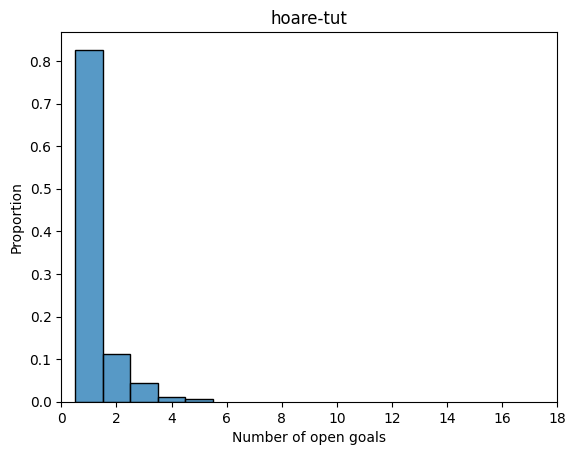

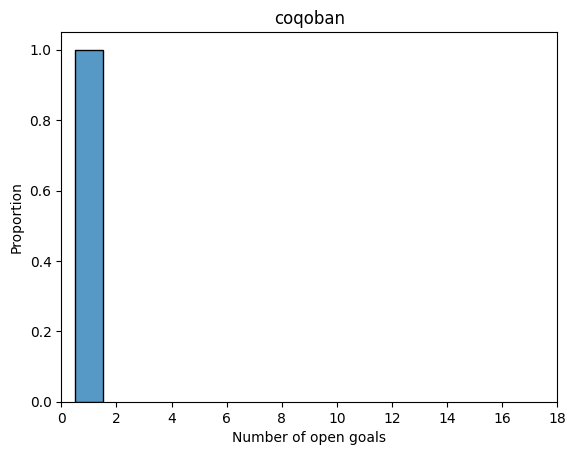

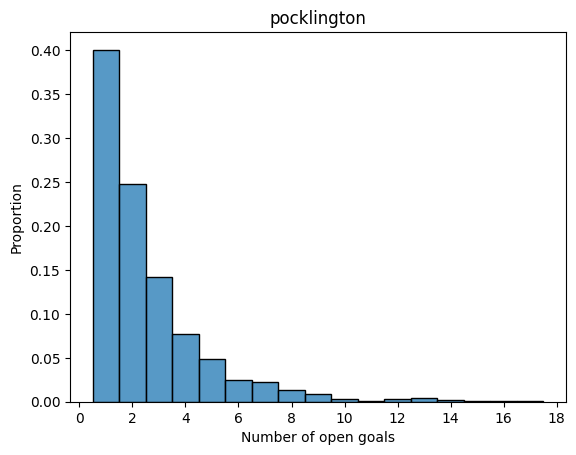

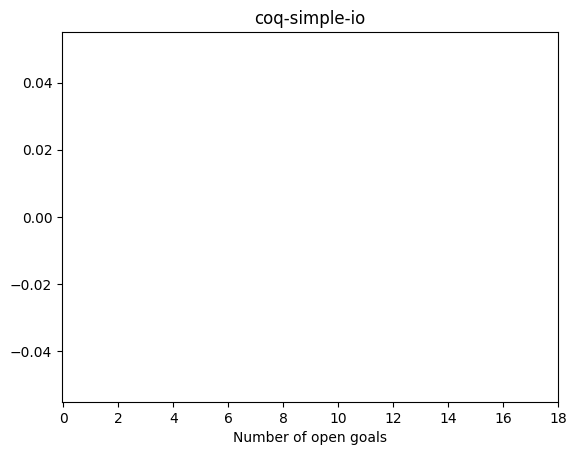

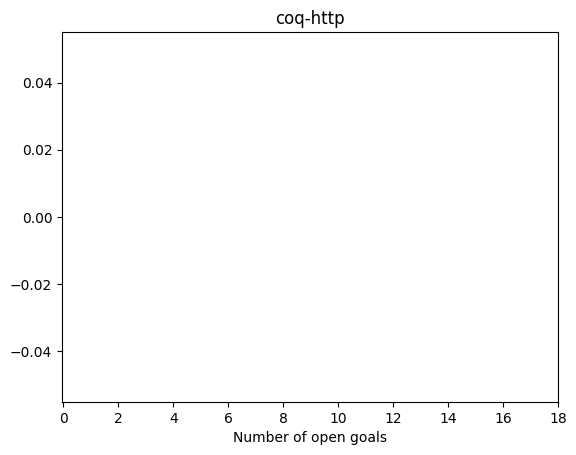

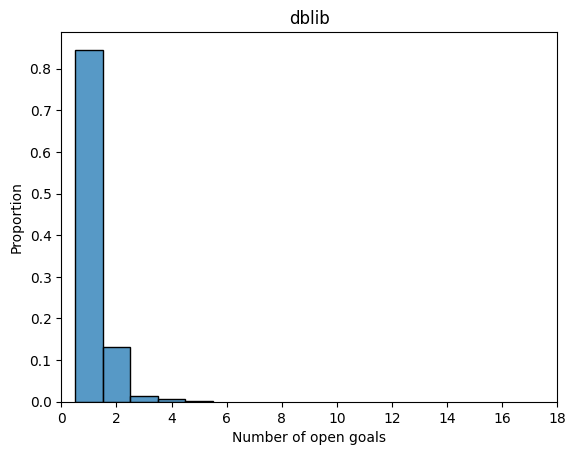

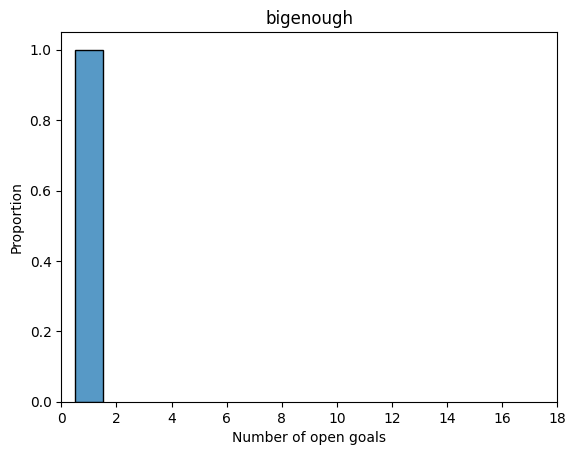

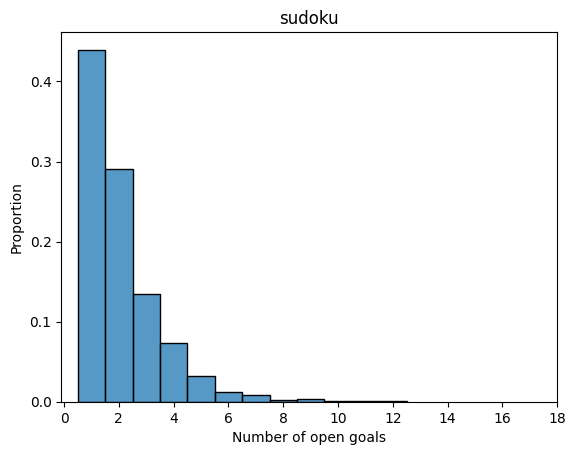

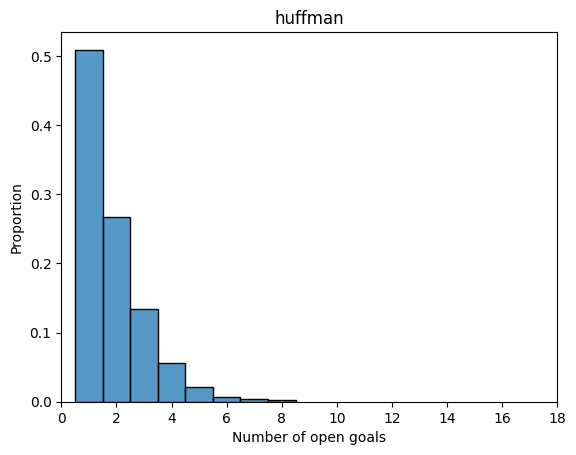

In [116]:
# Goal Histogram bonanza
project_names = list(df["project name"].unique())
for project_name in project_names:
    fig = plt.figure()
    sns.histplot(data=df_proofs_only[df_proofs_only["total goal count"] > 0].loc[df_proofs_only["project name"] == project_name], x="total goal count", stat="proportion", discrete=True)
    ax = fig.axes[0]
    ax.set_xticks(range(0, 20, 2))
    ax.set_xlabel("Number of open goals")
    ax.set_title(project_name)

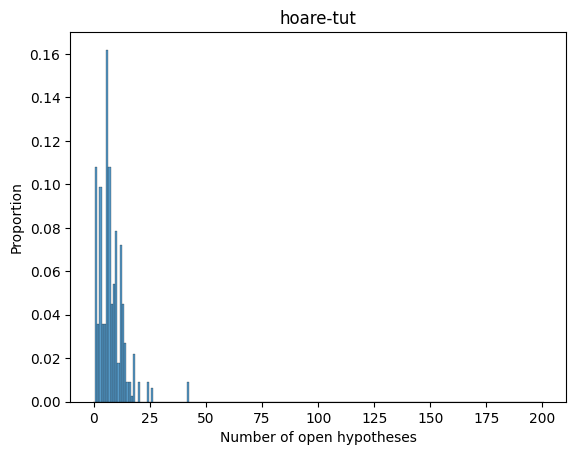

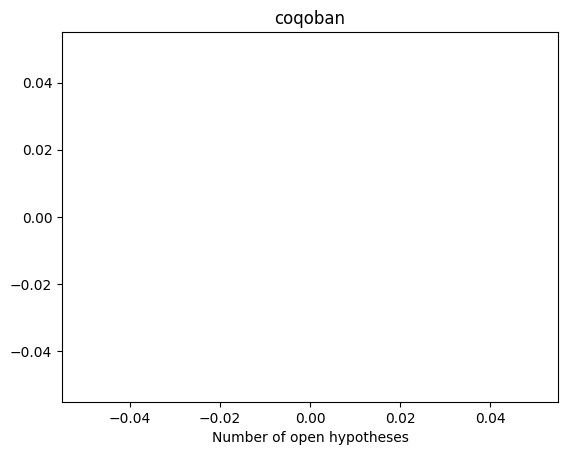

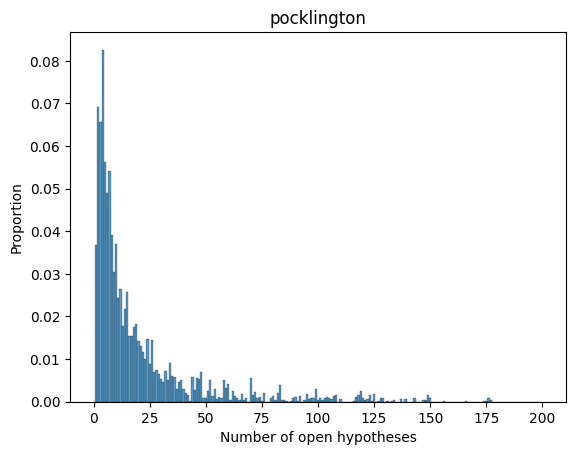

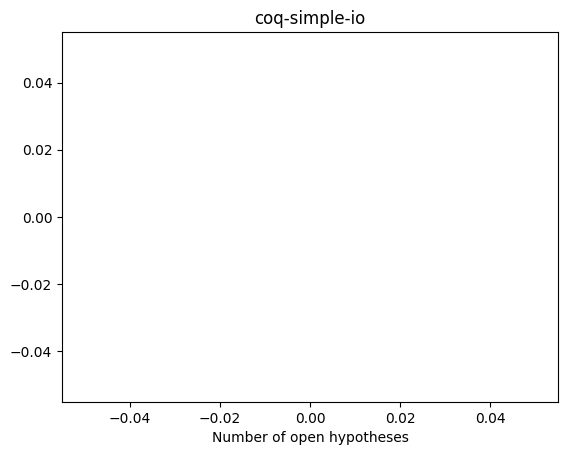

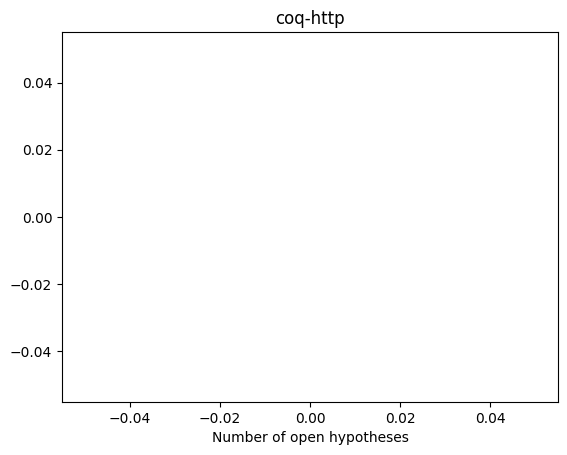

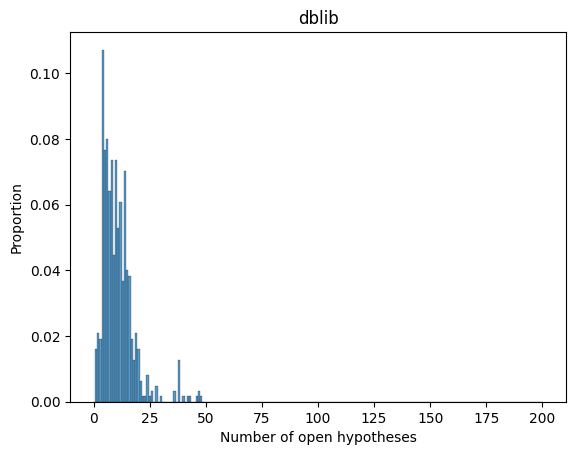

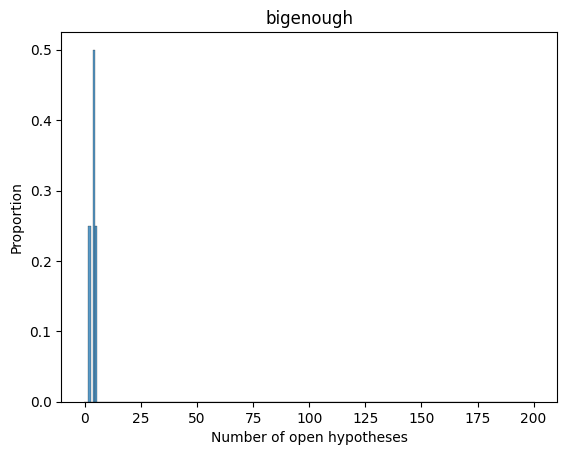

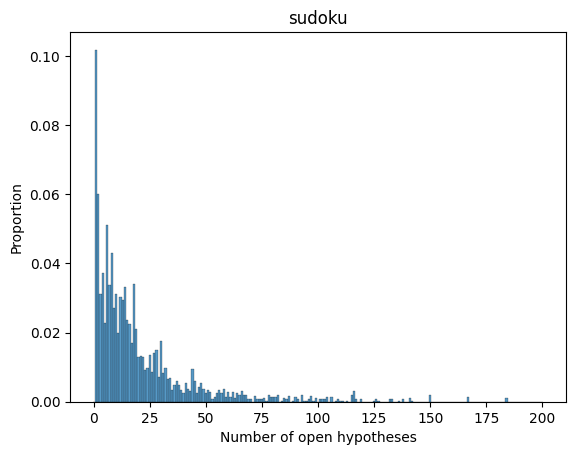

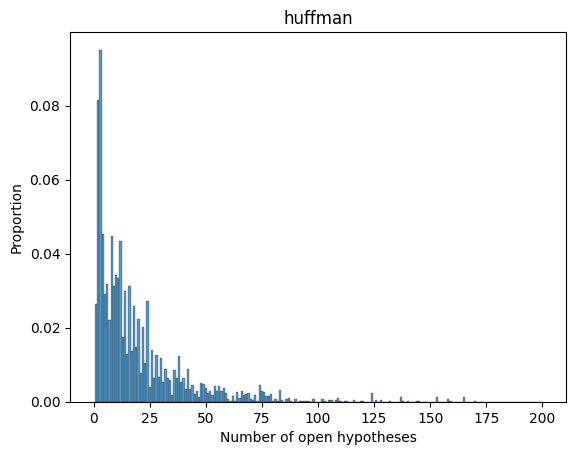

In [117]:
# Hypothesis Histogram bonanza
project_names = list(df["project name"].unique())
for project_name in project_names:
    fig = plt.figure()
    sns.histplot(data=df_proofs_only[df_proofs_only["total hypothesis count"] > 0].loc[df_proofs_only["project name"] == project_name], x="total hypothesis count", stat="proportion", discrete=True, binrange=[0, 200])
    ax = fig.axes[0]
    ax.set_xlabel("Number of open hypotheses")
    ax.set_title(project_name)